In [1]:
import importlib, inspect
module = importlib.import_module('numpy')
source_lines = inspect.getsourcelines(getattr(module, 'save'))
print(len(source_lines))

def get_indent(line, replace_line_indent='    '):
    return_indent_num = 0
    split_lines = line.split(replace_line_indent)
    for split_line in split_lines:
        if len(split_line) > 0:
            break
        return_indent_num += 1
    return return_indent_num

def get_collon(line, colon=':'):
    return (1 if len(line) > 0 and line[-1] == colon else 0)

2


In [2]:
sources = source_lines[0]
commentout_flg = 0
def_line = 0
total_indent_num = None
replace_line_indent = '    '
colon = ':'
before_indent_num = 0
result_source_lines = []
before_parentheses = '('
after_parentheses = ')'

for idx in range(0, len(sources)):
    line = sources[idx].replace('\n', '')
    if line.find('@') > -1 or line.find('def') > -1:
        def_line = 1
    elif line.find('"""') > -1:
        if commentout_flg == 0:
            commentout_flg = 1
        elif commentout_flg == 1:
            commentout_flg = -1

    if def_line == 0 and commentout_flg == 0:
        if total_indent_num is None:
            total_indent_num = get_indent(line)

        indent_num = get_indent(line)
        output_line = line[len(replace_line_indent*total_indent_num):]
        colon_flg = get_collon(output_line)
        msg = ''
        indent_before_after_num = None
        if indent_num == before_indent_num:
            indent_before_after_num = 0
            msg = 'indent_num == before_indent_num'
        elif indent_num > before_indent_num:
            indent_before_after_num = 1
            msg = 'indent_num > before_indent_num'
        elif indent_num < before_indent_num:
            indent_before_after_num = -1
            msg = 'indent_num < before_indent_num'
        # print(idx, '\t', indent_num, colon_flg, '\t', msg, '\t', output_line)
        split_before_line = output_line.split(before_parentheses)
        len_split_before_line = len(split_before_line) - 1
        split_after_line = output_line.split(after_parentheses)
        len_split_after_line = len(split_after_line) - 1
        result_source_lines.append([indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line])
        before_indent_num = indent_num
        
        
    def_line = 0
    if commentout_flg == -1:
        commentout_flg = 0

recreate_result_source_lines = []
z_fill_num = 2
start_num = None
source_idx = 0
pop_counter = 0
len_result_source_lines = len(result_source_lines)
for idx in range(0, len_result_source_lines):
    if idx + pop_counter + 1 >= len_result_source_lines:
        break
    [indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line] = result_source_lines[idx + pop_counter]
    if start_num is None:
        start_num = indent_num
    indent_num = indent_num - start_num
    if len_split_before_line == len_split_after_line:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
    else:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
        before_after_parentheses_sum = len_split_before_line
        for line_idx in range(idx + 1, len(result_source_lines)):
            [t_indent_num, t_colon_flg, t_indent_before_after_num, t_len_split_before_line, t_len_split_after_line, t_output_line] = result_source_lines[line_idx]
            recreate_result_source_lines[-1][-1] += t_output_line.replace(replace_line_indent, '')
            result_source_lines.pop(line_idx)
            pop_counter += 1
            before_after_parentheses_sum += t_len_split_before_line
            if before_after_parentheses_sum >= t_len_split_after_line:
                pop_counter -= 1
                break

In [3]:
def add_list_len(indent_num, add_list):
    return_ary_list = add_list.copy()
    for idx in range(0, indent_num):
        return_ary_list = [return_ary_list]
    return return_ary_list
    
source_list = []
total_flg = 0
before_indent_num = -1
change_flg = 0

tmp_sources = []
for idx in range(0, len(recreate_result_source_lines)):
    [indent_num, colon_flg, indent_before_after_num, line] = recreate_result_source_lines[idx]
    if len(line) == 0:
        continue
    if before_indent_num == -1 or before_indent_num == indent_num:
        # source_dictionary['subgraph'][0] = add_node(source_dictionary['subgraph'][0], output_line)
        # print('before_indent_num == -1 or before_indent_num == indent_num')
        # tmp_sources.append(line)
        pass
    elif before_indent_num > indent_num:
        # subgraph_idx -= 1
        # print('before_indent_num > indent_num')
        change_flg = 1
    elif before_indent_num < indent_num:
        # subgraph_idx += 1
        # print('before_indent_num < indent_num')
        change_flg = 1
    # print(
    #     str(idx).zfill(z_fill_num),
    #     '\t',
    #     str(indent_num).zfill(z_fill_num),
    #     str(colon_flg).zfill(z_fill_num),
    #     str(indent_before_after_num).zfill(z_fill_num),
    #     str(subgraph_idx).zfill(z_fill_num),
    #    line)
    
    if change_flg == 1:
        # print(tmp_sources)
        source_list.append(add_list_len(before_indent_num, tmp_sources))
        tmp_sources = []
    tmp_sources.append(line)
    before_indent_num = indent_num
    change_flg = 0

In [9]:
import importlib
import graphviz

svg_extension='svg'
dot='.'
file_path='./'
file_name='activate'
graph_type='Digraph'
engine='dot'
file_extension='svg'
graph_type = getattr(graphviz, graph_type)
graph = graph_type(
    name='root',
    format=file_extension,
    engine=engine
)

In [16]:
def add_subgraph(parent_graph, t_lines, target_lines_ndim, cnt=1):
    with parent_graph.subgraph(name='chld') as sub:
        if target_lines_ndim == cnt:
            # add node
            for t_line_idx in range(0, len(t_lines)):
                print('\t\t', str(t_line_idx).zfill(2), t_lines[t_line_idx])
                sub.node(t_lines[t_line_idx])
        else:
            add_subgraph(sub, t_lines[0], target_lines_ndim, cnt=cnt+1)
            
    
before_target_lines_ndim = None

for idx in range(0, len(source_list)):
    print('*'*25)
    # target_lines = source_list[idx]
    target_lines = getattr(module, 'array')(source_list[idx])
    target_lines_shape = target_lines.shape
    target_lines_ndim = target_lines.ndim
    target_lines_size = target_lines.size
    print(str(idx).zfill(2), target_lines_shape, target_lines_ndim, target_lines_size, len(target_lines), target_lines)
    # print('\t', target_lines_shape, target_lines_ndim, target_lines_size)
    t_json = None
    if target_lines_ndim == 1:
        t_lines = target_lines
        add_subgraph(graph, t_lines, 1, cnt=1)
        # with graph.subgraph(name=str(idx).zfill(2)) as sub:
        #     for t_line_idx in range(0, len(t_lines)):
        #         print('\t\t', str(t_line_idx).zfill(2), t_lines[t_line_idx])
        #         sub.node(t_lines[t_line_idx])
        
    else:
        t_lines = None
        t_lines = target_lines[0]
        with graph.subgraph(name=str(idx).zfill(2)) as sub:
            # for ndim_idx in range(1, target_lines_ndim - 1):
            #     t_lines = t_lines[0]
            add_subgraph(sub, t_lines, target_lines_ndim - 1, cnt=1)
            # for t_line_idx in range(0, len(t_lines)):
            #     print('\t\t', str(t_line_idx).zfill(2), t_lines[t_line_idx])
            #     sub.node(t_lines[t_line_idx])
    before_target_lines_ndim = target_lines_ndim

*************************
00 (2,) 1 2 2 ['own_fid = False' "if hasattr(file, 'read'):"]
		 00 own_fid = False
		 01 if hasattr(file, 'read'):
*************************
01 (1, 1) 2 1 1 [['    fid = file']]
		 00     fid = file
*************************
02 (1,) 1 1 1 ['else:']
		 00 else:
*************************
03 (1, 2) 2 2 1 [['    file = os_fspath(file)' "    if not file.endswith('.npy'):"]]
		 00     file = os_fspath(file)
		 01     if not file.endswith('.npy'):
*************************
04 (1, 1, 1) 3 1 1 [[["        file = file + '.npy'"]]]
		 00         file = file + '.npy'
*************************
05 (1, 2) 2 2 1 [['    fid = open(file, "wb")' '    own_fid = True']]
		 00     fid = open(file, "wb")
		 01     own_fid = True
*************************
06 (1,) 1 1 1 ['if sys.version_info[0] >= 3:']
		 00 if sys.version_info[0] >= 3:
*************************
07 (1, 1) 2 1 1 [['    pickle_kwargs = dict(fix_imports=fix_imports)']]
		 00     pickle_kwargs = dict(fix_imports=fix_impo

In [17]:
graph

In [19]:
print(graph.source)

digraph root {
	subgraph 00 {
		"own_fid = False"
		"if hasattr(file, 'read'):"
	}
	subgraph 01 {
		"    fid = file"
	}
	subgraph 02 {
		"else:"
	}
	subgraph 03 {
		"    file = os_fspath(file)"
		"    if not file.endswith('.npy'):"
	}
	subgraph 04 {
		"        file = file + '.npy'"
	}
	subgraph 05 {
		"    fid = open(file, \"wb\")"
		"    own_fid = True"
	}
	subgraph 06 {
		"if sys.version_info[0] >= 3:"
	}
	subgraph 07 {
		"    pickle_kwargs = dict(fix_imports=fix_imports)"
	}
	subgraph 08 {
		"else:"
	}
	subgraph 09 {
		"    # Nothing to do on Python 2"
		"    pickle_kwargs = None"
	}
	subgraph 10 {
		"try:"
	}
	subgraph 11 {
		"    arr = np.asanyarray(arr)"
		"    format.write_array(fid, arr, allow_pickle=allow_pickle,   pickle_kwargs=pickle_kwargs)"
	}
	subgraph 12 {
		"finally:"
	}
	subgraph 13 {
		"    if own_fid:"
	}
	subgraph 00 {
		"own_fid = False"
		"if hasattr(file, 'read'):"
	}
	subgraph 00 {
		"own_fid = False"
		"if hasattr(file, 'read'):"
	}
	subgraph 00 {
		"own_fid = 

In [84]:
class graph_creator(object):
    
    def __init__(self,
                 target_json,
                 svg_extension='svg',
                 dot='.',
                 file_path='./',
                 file_name='activate',
                 graph_type='Digraph',
                 engine='dot',
                 file_extension='svg'):
        import importlib
        import graphviz
        self.target_json = target_json
        self.graphviz = graphviz
        self.graph_type = getattr(graphviz, graph_type)
        self.file_extension = file_extension
        self.file_path = file_path
        self.file_name = file_name
        self.dot = dot
        self.engine = engine
        self.graph = self.graph_type(
            name='root',
            format=self.file_extension,
            engine=self.engine)
        self._create_graph()
        
    def _check_dictionary(self, dictionary, target_str):
        if dictionary.get(target_str) is None:
            return None
        else:
            return dictionary[target_str]
    def _check_attrs(self, attrs):
        attr_id = self._check_dictionary(attrs, 'id')
        attr_shape = self._check_dictionary(attrs, 'shape')
        attr_shape = attr_shape if attr_shape is not None else 'rect'
        attr_label = self._check_dictionary(attrs, 'label')
        attr_style = self._check_dictionary(attrs, 'style')
        attr_color = self._check_dictionary(attrs, 'color')
        return [attr_id, attr_shape, attr_label, attr_style, attr_color]
    
    def _create_subgraph(self, parent_graph, subgraphs):
        for idx in range(0, len(subgraphs)):
            subgraph = subgraphs[idx]
            child_subgraph = None
            if subgraph.get('subgraph') is not None:
                child_subgraph = subgraph['subgraph']

            name = subgraph['name']
            attrs = subgraph['attr']
            node_attr = subgraph['node_attr']
            nodes = subgraph['nodes']
            edges = subgraph['edges']
            print(name)
            print(attrs)
            print(node_attr)
            print(nodes)
            print(edges)

            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)

            [node_attr_id, node_attr_shape, node_attr_label, node_attr_style, node_attr_color] = self._check_attrs(node_attr)

            with parent_graph.subgraph(name=name) as sub:
                if child_subgraph is not None:
                    self._create_subgraph(sub, child_subgraph)
                for node_idx in range(0, len(nodes)):
                    # sub.node()
                    node = nodes[node_idx]
                    child_node_attr = node['attr']
                    [child_node_attr_id, child_node_attr_shape, child_node_attr_label, child_node_attr_style, child_node_attr_color] = self._check_attrs(child_node_attr)
                    sub.node(child_node_attr_id, id=child_node_attr_id, shape=child_node_attr_shape, label=child_node_attr_label, style=child_node_attr_style, color=child_node_attr_color)
                sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
                sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
                self._create_nodes(sub, nodes)
                self._create_edges(sub, edges)

    def _create_nodes(self, parent_graph, target_nodes):
        for idx in range(0, len(target_nodes)):
            target_node = target_nodes[idx]
            attrs = target_node['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_edges(self, parent_graph, target_edges):
        for idx in range(0, len(target_edges)):
            target_attr = target_edges[idx]
            edge = target_attr['edge']
            attrs = target_attr['attr']
            print(attrs)
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
            
    def _create_graph(self):
        self._create_subgraph(self.graph, self.target_json['subgraph'])
        # self._create_nodes(self.graph, self.target_json['nodes'])
        # self._create_edges(self.graph, self.target_json['edges'])

    def output_graph(self):
        output_file_path = self.file_path + self.file_name
        self.graph.render(output_file_path, view=False)


In [87]:
output_graph_dict = {
    'subgraph': [
        {
            'name': 'root',
            'attr': {},
            'node_attr': {},
            'nodes': [
                {
                    'attr': {
                        'id': 'start',
                        'shape': 'Mdiamond'
                    }
                },
                {
                    'attr': {
                        'id': 'end',
                        'shape': 'Mdiamond'
                    }
                },
            ],
            'edges': [
                {
                    'edge': ('start', 'a1'),
                    'attr': {'id': 'start-a1'}
                }, {
                    'edge': ('b3', 'end'),
                    'attr': {'id': 'b3-end'}
                }, {
                    'edge': ('a3', 'end'),
                    'attr': {'id': 'a3-end'}
                }, {
                    'edge': ('a1', 'b3'),
                    'attr': {'id': 'a1-b3'}
                }, {
                    'edge': ('b2', 'a3'),
                    'attr': {'id': 'b2-a3'}
                }, {
                    'edge': ('start', 'b0'),
                    'attr': {'id': 'start-b0'}
                },
            ],
            'subgraph': [
                {
                    'name': 'cluster_0',
                    'attr': {
                        'style': 'filled',
                        'color': 'lightgrey',
                        'label': 'process #1'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'white'
                    },
                    'nodes': [
                        {'attr': {'id': 'a0'}},
                        {'attr': {'id': 'a1'}},
                        {'attr': {'id': 'a2'}},
                        {'attr': {'id': 'a3'}},
                    ],
                    'edges': [
                        {
                            'edge': ('a0', 'a1'),
                            'attr': {'id': 'a0-a1'}
                        }, {
                            'edge': ('a1', 'a2'),
                            'attr': {'id': 'a1-a2'}
                        }, {
                            'edge': ('a2', 'a3'),
                            'attr': {'id': 'a2-a3'}
                        }, {
                            'edge': ('a3', 'a0'),
                            'attr': {'id': 'a3-a0'}
                        },
                    ],
                    'subgraph': [
                        {
                            'name': 'cluster_2',
                            'attr': {
                                'style': 'filled',
                                'label': 'process #3'
                            },
                            'node_attr': {
                                'style': 'filled',
                                'color': 'yellow'
                            },
                            'nodes': [
                                {'attr': {'id': 'c0'}},
                                {'attr': {'id': 'c1'}},
                                {'attr': {'id': 'c2'}},
                                {'attr': {'id': 'c3'}},
                            ],
                            'edges': [],
                        },
                    ]
                },
                {
                    'name': 'cluster_1',
                    'attr': {
                        'color': 'blue',
                        'label': 'process #2'
                    },
                    'node_attr': {
                        'style': 'filled'
                    },
                    'nodes': [
                        {'attr': {'id': 'b0'}},
                        {'attr': {'id': 'b1'}},
                        {'attr': {'id': 'b2'}},
                        {'attr': {'id': 'b3'}}
                    ],
                    'edges': [
                        {
                            'edge': ('b0', 'b1'),
                            'attr': {'id': 'b0-b1'}
                        }, {
                            'edge': ('b1', 'b2'),
                            'attr': {'id': 'b1-b2'}
                        }, {
                            'edge': ('b2', 'b3'),
                            'attr': {'id': 'b2-b3'}
                        }
                    ]
                }
            ],
        },
    ]
}

In [88]:
from graphviz import Digraph

file_path = './../data/create/'
file_name = 'activate-graph-20200229-8'

gc = graph_creator(output_graph_dict, file_path=file_path, file_name=file_name)
gc.output_graph()

root
{}
{}
[{'attr': {'id': 'start', 'shape': 'Mdiamond'}}, {'attr': {'id': 'end', 'shape': 'Mdiamond'}}]
[{'edge': ('start', 'a1'), 'attr': {'id': 'start-a1'}}, {'edge': ('b3', 'end'), 'attr': {'id': 'b3-end'}}, {'edge': ('a3', 'end'), 'attr': {'id': 'a3-end'}}, {'edge': ('a1', 'b3'), 'attr': {'id': 'a1-b3'}}, {'edge': ('b2', 'a3'), 'attr': {'id': 'b2-a3'}}, {'edge': ('start', 'b0'), 'attr': {'id': 'start-b0'}}]
cluster_0
{'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}
{'style': 'filled', 'color': 'white'}
[{'attr': {'id': 'a0'}}, {'attr': {'id': 'a1'}}, {'attr': {'id': 'a2'}}, {'attr': {'id': 'a3'}}]
[{'edge': ('a0', 'a1'), 'attr': {'id': 'a0-a1'}}, {'edge': ('a1', 'a2'), 'attr': {'id': 'a1-a2'}}, {'edge': ('a2', 'a3'), 'attr': {'id': 'a2-a3'}}, {'edge': ('a3', 'a0'), 'attr': {'id': 'a3-a0'}}]
cluster_2
{'style': 'filled', 'label': 'process #3'}
{'style': 'filled', 'color': 'yellow'}
[{'attr': {'id': 'c0'}}, {'attr': {'id': 'c1'}}, {'attr': {'id': 'c2'}}, {'attr': {'

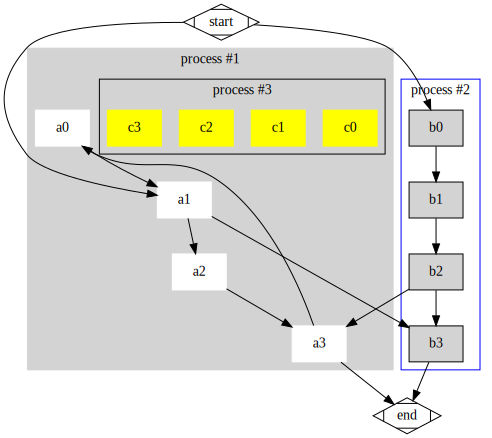

In [89]:
gc.graph